In [1]:
import tensorflow as tf

In [2]:
!cd /content/drive/Mydrive

/bin/bash: line 0: cd: /content/drive/Mydrive: No such file or directory


In [3]:
!cd/content/drive/MyDrive/dogs-vs-cats
from zipfile import ZipFile
import os
from os import makedirs

/bin/bash: cd/content/drive/MyDrive/dogs-vs-cats: No such file or directory


In [4]:
###Extracting all the files from zip

In [5]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/dogs-vs-cats.zip', 'r',) as zipobj:
  #Extracting all the zipfile in current directory
  zipobj.extractall()

with ZipFile('train.zip', 'r',) as zipobj:
  #Extracting all the zipfile in current directory
  zipobj.extractall()

with ZipFile('test1.zip', 'r',) as zipobj:
  #Extracting all the zipfile in current directory
  zipobj.extractall()

#Creating subdirectories so the data is this format
  - dataset_dogs_vs_cats

      - train
       -- dogs
       -- cats

    - test
      -- dogs
      -- cats

In [6]:
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

for subdirs in subdirs:
  #create label subdirectories
  labeldirs = ['dogs/', 'cats/']
  for labldir in labeldirs:
    newdir = dataset_home + subdirs + labldir
    makedirs(newdir, exist_ok = True)

In [7]:
from os import makedirs
from os import listdir
from shutil import copyfile
# Create directories
from random import seed , random


In [8]:
seed(1)

The seed() method is used to initialize the random number generator. The random number generator needs a number to start with (a seed value), to be able to generate a random number. By default the random number generator uses the current system time.

In [9]:
# define ratio of pictures to use for validation
val_ratio = 0.25
# Copy training dataset image into subdirectories
src_directory = 'train'
dataset_name = 'dataset_dogs_vs_cats/'

for file in listdir(src_directory):
  src = src_directory + '/' + file
  dst_dir = 'train/'
  if random() < val_ratio:
    dst_dir = 'test/'
  
  if file.startswith('cat'):
    dst = dataset_name + dst_dir + 'cats/'+ file
    copyfile(src, dst)

  elif file.startswith('dog'):
    dst = dataset_name + dst_dir + 'dogs/' + file
    copyfile(src, dst)

##Prepare a model for transfer learning

In [10]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model

In [11]:
model = VGG16(include_top = False, input_shape = (224, 224, 3))
# mark loaded layers as not trainable

for layer in model.layers:
  layer.trainable = False



58900480/58889256 [==============================] - 0s 0us/step


In [12]:
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation = 'relu', kernel_initializer = 'he_uniform')(flat1)
output = Dense(1, activation = 'sigmoid')(class1)

In [13]:
#define new model
model = Model(inputs = model.inputs, outputs = output)

In [14]:
# compile model
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

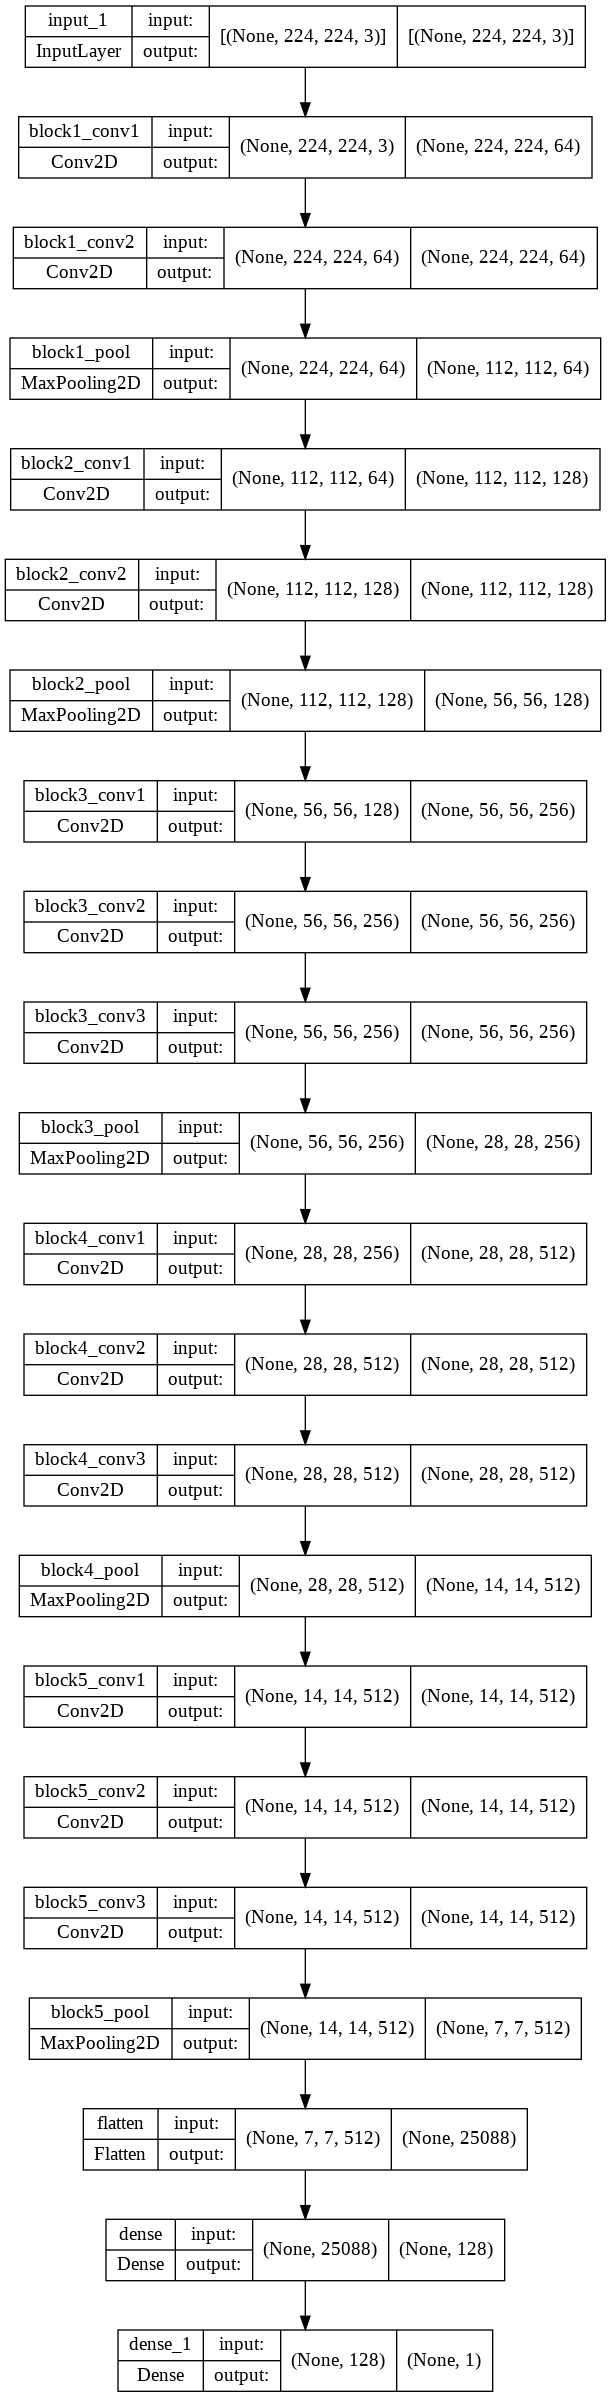

In [16]:
tf.keras.utils.plot_model(model, show_shapes = True)

Run the model using generator

In [17]:
datagen = ImageDataGenerator(featurewise_center = True)
# specify imagenet mean values for centering
datagen.mean = [123.68, 116.79, 103.939]

#prepare iterator
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
class_mode = 'binary', batch_size = 64, target_size = (224, 224))

test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
class_mode = 'binary', batch_size = 64, target_size = (224, 224))


#fit model

history = model.fit_generator(train_it, steps_per_epoch = len(train_it), 
                              validation_data = test_it, validation_steps = len(test_it), epochs = 5, verbose = 1)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/5
293/293 [==============================] - 152s 464ms/step - loss: 0.1778 - accuracy: 0.9650 - val_loss: 0.0762 - val_accuracy: 0.9733
Epoch 2/5
293/293 [==============================] - 135s 460ms/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0790 - val_accuracy: 0.9730
Epoch 3/5
293/293 [==============================] - 135s 462ms/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0951 - val_accuracy: 0.9757
Epoch 4/5
293/293 [==============================] - 135s 460ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1113 - val_accuracy: 0.9765
Epoch 5/5
293/293 [==============================] - 138s 469ms/step - loss: 7.9673e-04 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy: 0.9767


In [18]:
print(train_it.class_indices)
print(test_it.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [19]:
import matplotlib.pyplot as plt
import sys

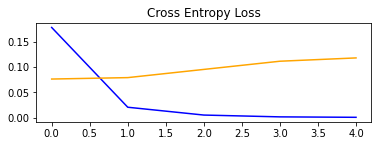

In [20]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color = 'blue', label = 'train')
plt.plot(history.history['val_loss'], color = 'orange', label = 'test')

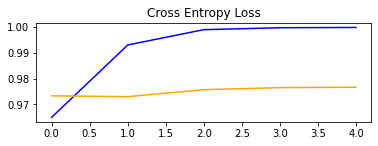

In [21]:
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')

In [22]:
# # save plot file
# filename = sys.argv[0].split('/')[-1]
# plt.savefig(filename + '_plot.png')

Save the model for future use

In [76]:
model.save('final_model.h5')

Predict output from model


In [77]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [97]:
# Load and prepare the image
# load the image
img = load_img('/content/train/dog.smile.jpg', target_size = (224, 224))

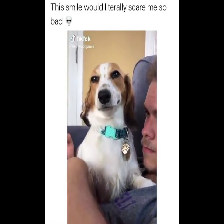

In [98]:
img

In [99]:
# convert to array
img = img_to_array(img)

In [100]:
# Reshape into a single sample with 3 channels of RGB
img = img.reshape(1, 224, 224, 3)


In [101]:
# Center pixel data
img = img.astype('float32')
img = img - [123.68, 116.779, 103.939]

In [102]:
# 1 is for dogs and 0 for cats
result = model.predict(img)
print(result[0])

[1.]


In [107]:
# Load and prepare the image
# load the image
img = load_img('/content/train/dog.10000001.jpg', target_size = (224, 224))

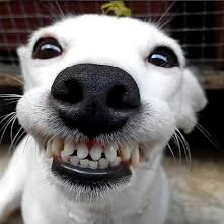

In [108]:
img

In [110]:
# convert to array
img = img_to_array(img)
# Reshape into a single sample with 3 channels of RGB
img = img.reshape(1, 224, 224, 3)
# Center pixel data
img = img.astype('float32')
img = img - [123.68, 116.779, 103.939]

In [113]:
# 1 is for dogs and 0 for cats
result = model.predict(img)
print(result[0])

[0.9999994]
